<a href="https://colab.research.google.com/github/harsha1067/ASSIGNMENTS/blob/main/Assignment_15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Random Forest
 
Assignment


About the data: 
Let’s consider a Company dataset with around 10 variables and 400 records. 
The attributes are as follows: 

 Sales -- Unit sales (in thousands) at each location

 Competitor Price -- Price charged by competitor at each location

 Income -- Community income level (in thousands of dollars)

 Advertising -- Local advertising budget for company at each location (in thousands of dollars)

 Population -- Population size in region (in thousands)

 Price -- Price company charges for car seats at each site

 Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site

 Age -- Average age of the local population

 Education -- Education level at each location

 Urban -- A factor with levels No and Yes to indicate whether the store is in 
an urban or rural location

 US -- A factor with levels No and Yes to indicate whether the store is in the US or not

The company dataset looks like this: 
 
Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 

Approach - A Random Forest can be built with target variable Sales (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree 


In [123]:
df = pd.read_csv('Company_Data.csv')
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [125]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [126]:
df.shape

(400, 11)

In [127]:
df.isnull().any()

Sales          False
CompPrice      False
Income         False
Advertising    False
Population     False
Price          False
ShelveLoc      False
Age            False
Education      False
Urban          False
US             False
dtype: bool

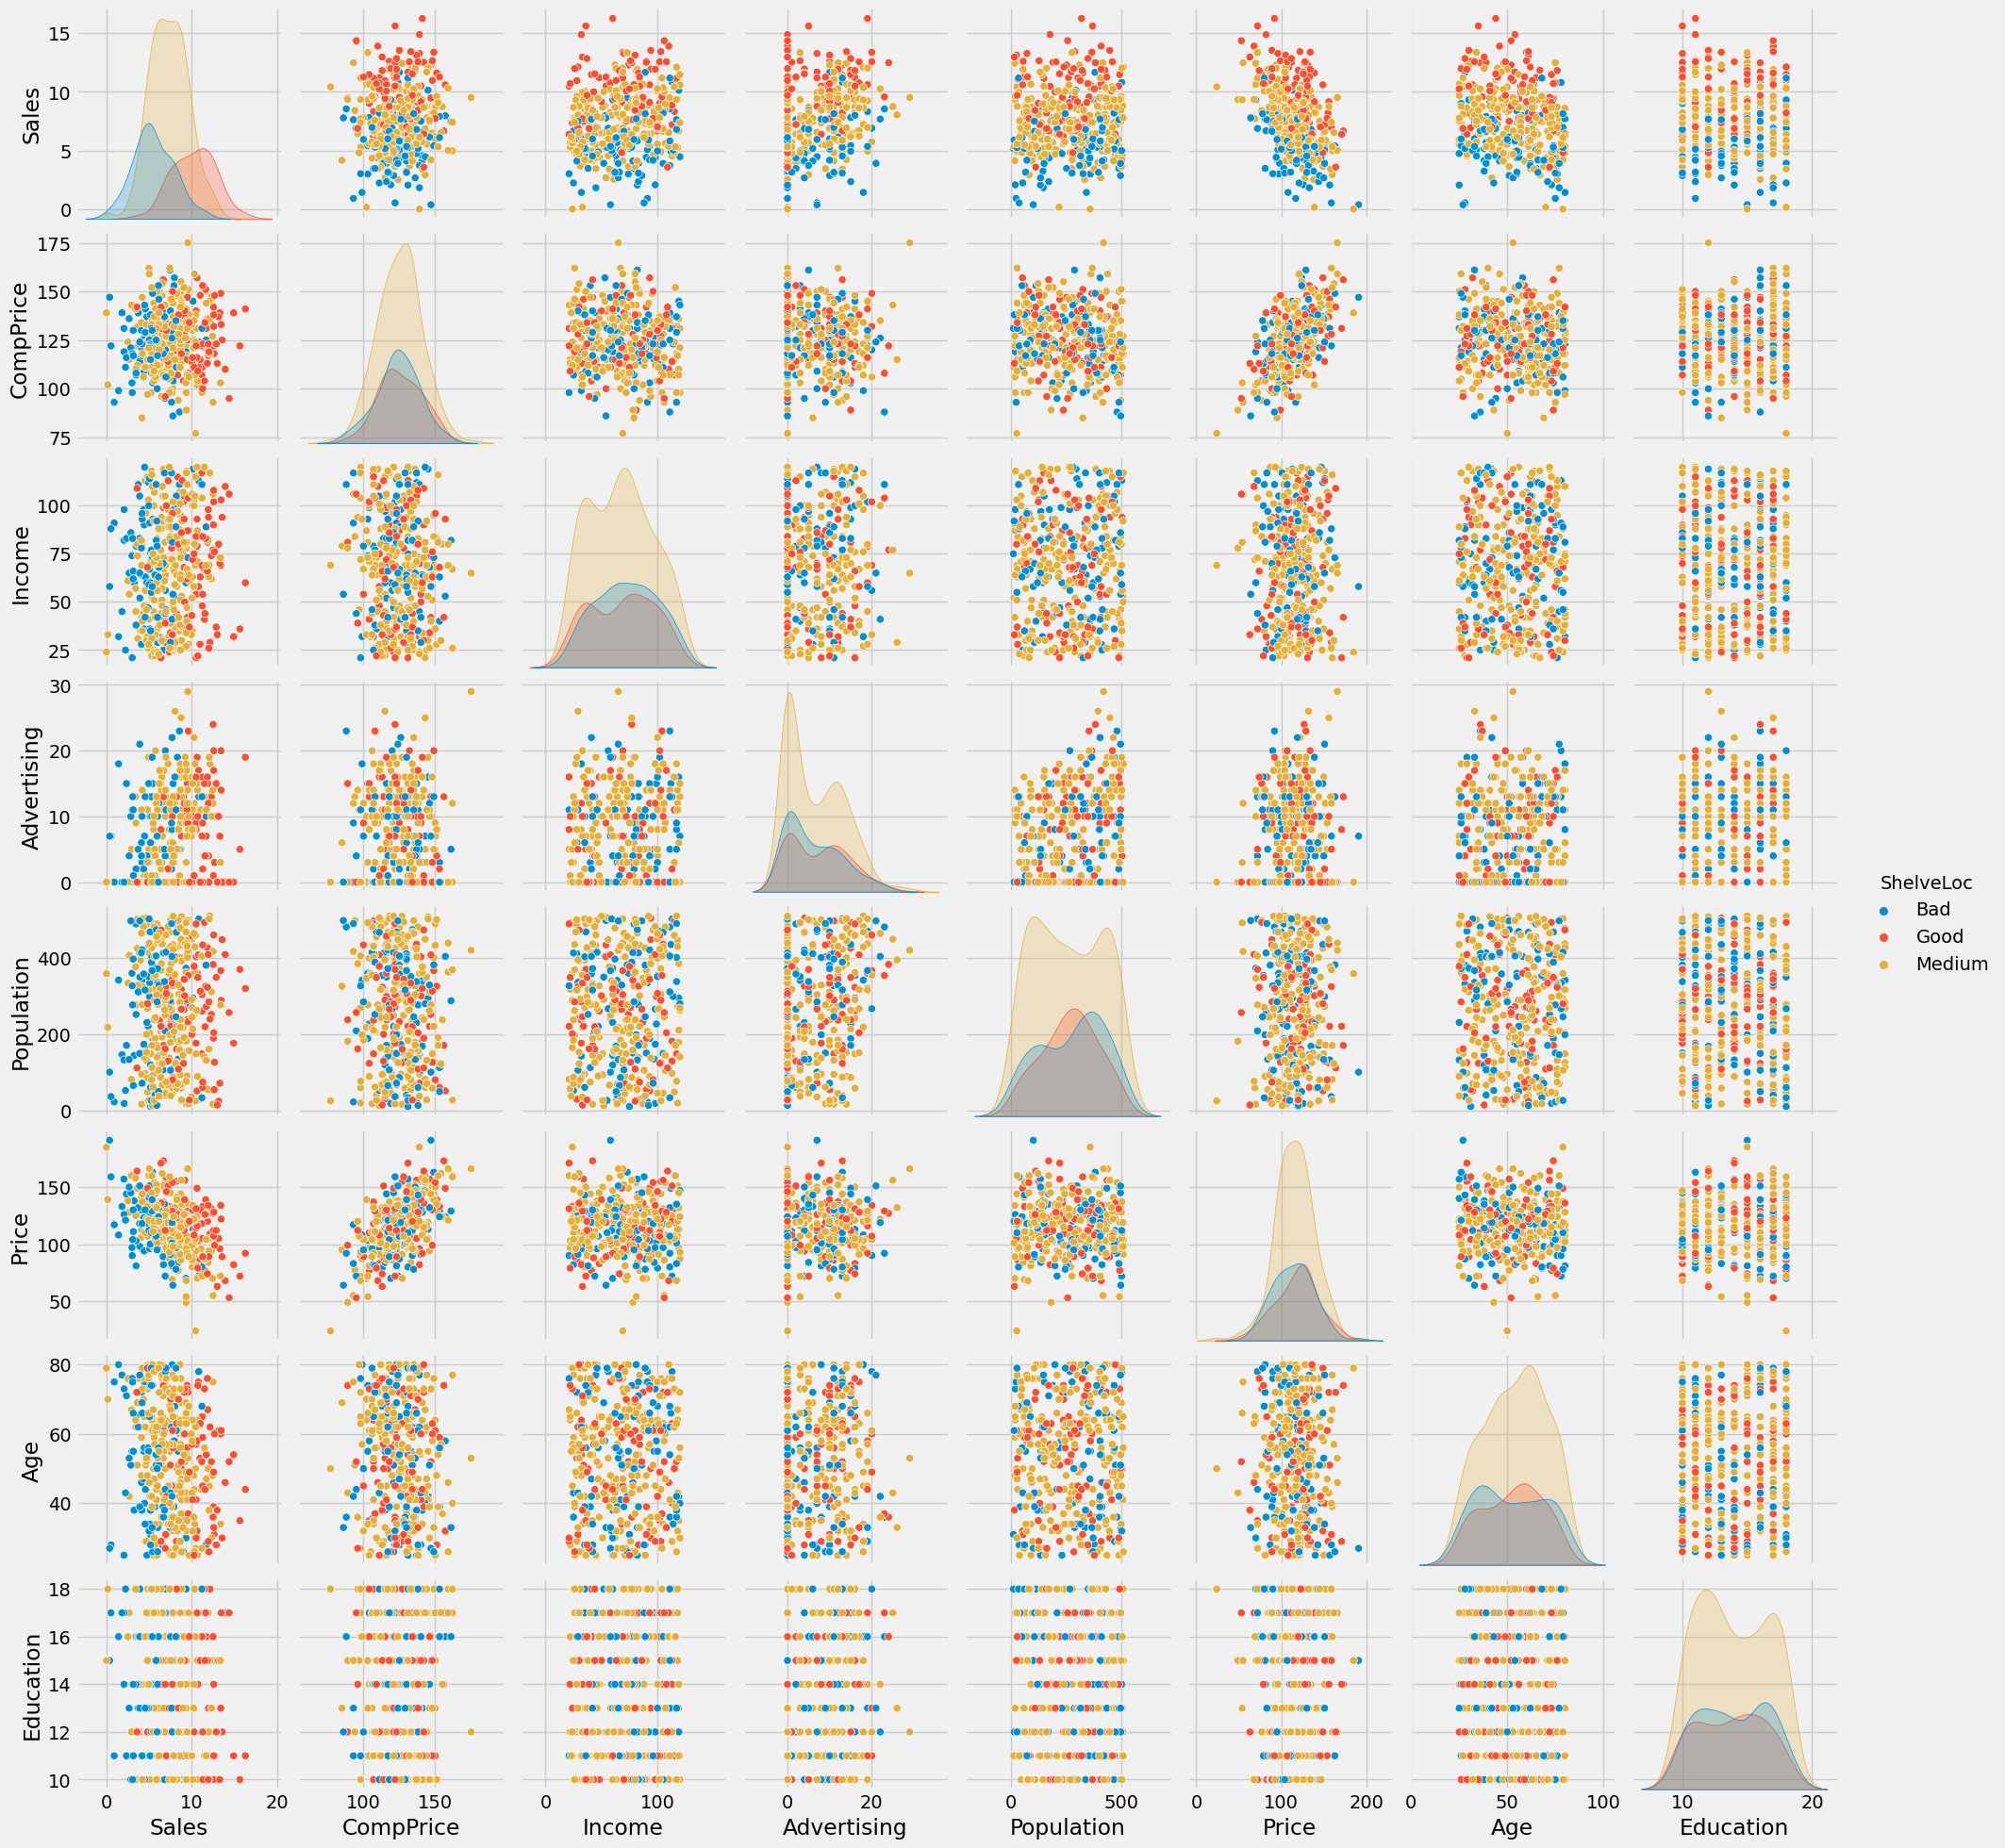

In [128]:
sns.pairplot(data = df, hue = 'ShelveLoc')

In [129]:
df1 = pd.get_dummies(df, columns = ['Urban', 'US'], drop_first = True)
df1.head(11)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,Bad,42,17,1,1
1,11.22,111,48,16,260,83,Good,65,10,1,1
2,10.06,113,35,10,269,80,Medium,59,12,1,1
3,7.40,117,100,4,466,97,Medium,55,14,1,1
4,4.15,141,64,3,340,128,Bad,38,13,1,0
5,10.81,124,113,13,501,72,Bad,78,16,0,1
6,6.63,115,105,0,45,108,Medium,71,15,1,0
7,11.85,136,81,15,425,120,Good,67,10,1,1
8,6.54,132,110,0,108,124,Medium,76,10,0,0
9,4.69,132,113,0,131,124,Medium,76,17,0,1


In [130]:
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split 

In [131]:
df1['ShelveLoc'] = df1['ShelveLoc'].map({'Good':1, 'Medium':2, 'Bad':3})
df1.head(11)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,3,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,3,38,13,1,0
5,10.81,124,113,13,501,72,3,78,16,0,1
6,6.63,115,105,0,45,108,2,71,15,1,0
7,11.85,136,81,15,425,120,1,67,10,1,1
8,6.54,132,110,0,108,124,2,76,10,0,0
9,4.69,132,113,0,131,124,2,76,17,0,1


In [132]:
x = df1.iloc[:, 0:6]
y = df1['ShelveLoc']
x.head(11)

,Sales,CompPrice,Income,Advertising,Population,Price
0,9.50,138,73,11,276,120
1,11.22,111,48,16,260,83
2,10.06,113,35,10,269,80
3,7.40,117,100,4,466,97
4,4.15,141,64,3,340,128
5,10.81,124,113,13,501,72
6,6.63,115,105,0,45,108
7,11.85,136,81,15,425,120
8,6.54,132,110,0,108,124
9,4.69,132,113,0,131,124


In [133]:
y.head(11)

0     3
1     1
2     2
3     2
4     3
5     3
6     2
7     1
8     2
9     2
10    3
Name: ShelveLoc, dtype: int64

In [134]:
df1['ShelveLoc'].unique()

array([3, 1, 2])

In [135]:
df1.ShelveLoc.value_counts()

2    219
3     96
1     85
Name: ShelveLoc, dtype: int64

In [136]:
col_names = list(df1.columns)
col_names

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban_Yes',
 'US_Yes']

In [137]:
df1.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,2.027500,53.322500,13.900000,0.705000,0.645000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,0.672961,16.200297,2.620528,0.456614,0.479113
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,1.000000,25.000000,10.000000,0.000000,0.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,2.000000,39.750000,12.000000,0.000000,0.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,2.000000,54.500000,14.000000,1.000000,1.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,2.000000,66.000000,16.000000,1.000000,1.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,3.000000,80.000000,18.000000,1.000000,1.000000


In [138]:
labels = np.array(df1['Income'])
df = df1.drop('Income', axis = 1)
df_list = list(df1.columns)
df = np.array(df1)

In [139]:
from sklearn.model_selection import train_test_split
train_df, test_df, train_labels, test_labels = train_test_split(df, labels, test_size = 0.2, random_state = 46)

In [140]:
print("Training df Shape:", train_df.shape)
print("Training Labels Shape:", train_labels.shape)
print("Testing df Shape:", test_df.shape)
print("Testing LAbels Shape:", test_labels.shape)

Training df Shape: (320, 11)
Training Labels Shape: (320,)
Testing df Shape: (80, 11)
Testing LAbels Shape: (80,)


In [141]:
baseline_pred = test_df[:, df_list.index('Sales')]
baseline_errors = abs(baseline_pred - test_labels)
("Average Baseline Error:", round(np.mean(baseline_errors), 2))

('Average Baseline Error:', 63.72)

In [142]:
from sklearn.ensemble import RandomForestRegressor 
RF = RandomForestRegressor(n_estimators = 1000, random_state = 46)
RF.fit(train_df, train_labels) 

RandomForestRegressor(n_estimators=1000, random_state=46)

In [143]:
pred = RF.predict(test_df)
errors = abs(pred - test_labels)
print("Mean Absolute Error:", round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.18 degrees.


In [144]:
mape = 100*(errors/test_labels)
acc = 100 - np.mean(mape)
print("Accuracy:", round(acc, 2),'%')

Accuracy: 99.75 %


In [145]:
from sklearn.tree import export_graphviz
import pydot 
tree = RF.estimators_[5]
export_graphviz(tree, out_file = 'tree.dot', feature_names = df_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree.png')

In [146]:
RF_small = RandomForestRegressor(n_estimators = 10, max_depth = 3)
RF_small.fit(train_df, train_labels)
tree_small = RF_small.estimators_[5]
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = df_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png')

In [147]:
importances = list(RF.feature_importances_)
df_importances = [(df, round(importance, 2)) for df, importance in zip(df_list, importances)]
df_importances = sorted(df_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in df_importances]

Variable: Income               Importance: 1.0
Variable: Sales                Importance: 0.0
Variable: CompPrice            Importance: 0.0
Variable: Advertising          Importance: 0.0
Variable: Population           Importance: 0.0
Variable: Price                Importance: 0.0
Variable: ShelveLoc            Importance: 0.0
Variable: Age                  Importance: 0.0
Variable: Education            Importance: 0.0
Variable: Urban_Yes            Importance: 0.0
Variable: US_Yes               Importance: 0.0


[None, None, None, None, None, None, None, None, None, None, None]

In [148]:
RF_most_important = RandomForestRegressor(n_estimators = 1000, random_state = 46)
important_indices = [df_list.index('Sales'), df_list.index('Income')]
train_important = train_df[:, important_indices]
test_important = test_df[:, important_indices]
RF_most_important.fit(train_important, train_labels)
pred = RF_most_important.predict(test_important)
errors = abs(pred - test_labels)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = np.mean(100*(errors/test_labels))
acc = 100-mape
print('Accuracy:', round(acc, 2), '%.')

Mean Absolute Error: 0.12 degrees.
Accuracy: 99.84 %.


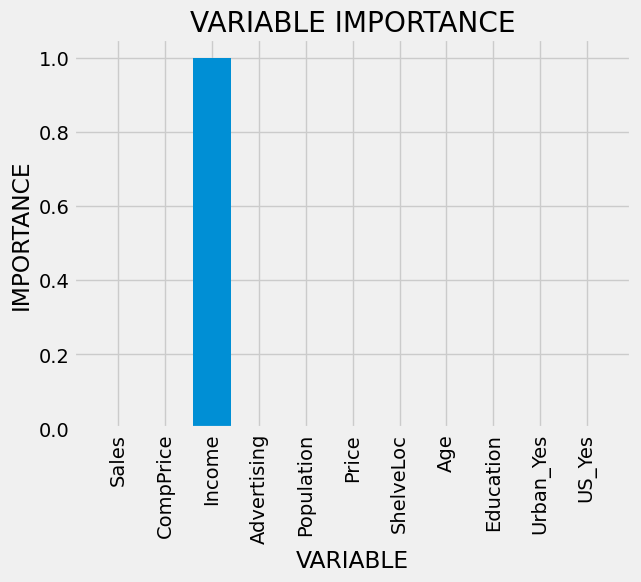

In [149]:
plt.style.use('fivethirtyeight')
x_values = list(range(len(importances)))
plt.bar(x_values, importances, orientation = 'vertical')
plt.xticks(x_values, df_list, rotation = 'vertical')
plt.ylabel('IMPORTANCE'); plt.xlabel('VARIABLE'); plt.title('VARIABLE IMPORTANCE');

Use Random Forest to prepare a model on fraud data 

treating those who have taxable_income <= 30000 as "Risky" and others are "Good"


In [150]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier as DTC 
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier as RF 
from sklearn.metrics import classification_report 
from sklearn.linear_model import LogisticRegression as LR
from sklearn.preprocessing import StandardScaler as SS
from sklearn.preprocessing import scale
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score 
from sklearn.ensemble import BaggingClassifier as BC 
from sklearn.ensemble import AdaBoostClassifier as ABC
from sklearn.ensemble import VotingClassifier as VC
from sklearn.svm import SVC

In [151]:
fr = pd.read_csv('Fraud_check.csv')
fr.head(11)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
5,NO,Divorced,33329,116382,0,NO
6,NO,Divorced,83357,80890,8,YES
7,YES,Single,62774,131253,3,YES
8,NO,Single,83519,102481,12,YES
9,YES,Divorced,98152,155482,4,YES


In [152]:
fr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [153]:
fr.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [154]:
fr.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [155]:
fr.insert(6, 'tax_class', "")
for i in range(0, len(fr['Taxable.Income']), 1):
  if fr['Taxable.Income'].iloc[i] <= 30000:
    fr['tax_class'].iloc[i] = 'Risky'
  else:
    fr['tax_class'].iloc[i] = 'Good'

In [156]:
fr.head(11)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,tax_class
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
5,NO,Divorced,33329,116382,0,NO,Good
6,NO,Divorced,83357,80890,8,YES,Good
7,YES,Single,62774,131253,3,YES,Good
8,NO,Single,83519,102481,12,YES,Good
9,YES,Divorced,98152,155482,4,YES,Good


In [157]:
fr.tax_class.value_counts()

Good     476
Risky    124
Name: tax_class, dtype: int64

In [158]:
fr.drop(['Taxable.Income'], axis = 1, inplace = True)
fr.head(11)

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,tax_class
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good
5,NO,Divorced,116382,0,NO,Good
6,NO,Divorced,80890,8,YES,Good
7,YES,Single,131253,3,YES,Good
8,NO,Single,102481,12,YES,Good
9,YES,Divorced,155482,4,YES,Good


In [159]:
fr.rename(columns = {"Undergrad" : "UG", "Marital.Status" : "marital", "City.Population" : "pop", "Work.Experience" : "exp", "Urban" : "urban"}, inplace = True)

In [160]:
label_encoder = preprocessing.LabelEncoder()
fr['UG'] = label_encoder.fit_transform(fr['UG'])
fr['marital'] = label_encoder.fit_transform(fr['marital'])
fr['urban'] = label_encoder.fit_transform(fr['urban'])
fr['tax_class'] = label_encoder.fit_transform(fr['tax_class'])

In [161]:
fr.head(11)

,UG,marital,pop,exp,urban,tax_class
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0
5,0,0,116382,0,0,0
6,0,0,80890,8,1,0
7,1,2,131253,3,1,0
8,0,2,102481,12,1,0
9,1,0,155482,4,1,0


In [162]:
fr.iloc[:,  2:4] = SS().fit_transform(fr.iloc[:, 2:4])
fr.head(11)

,UG,marital,pop,exp,urban,tax_class
0,0,2,-1.178521,-0.629143,1,0
1,1,0,0.508500,0.276370,1,0
2,0,1,1.033109,1.634639,1,0
3,1,2,1.696831,-0.063197,1,0
4,0,1,-1.630532,1.408261,0,0
5,0,0,0.153280,-1.761033,0,0
6,0,0,-0.559289,-0.855521,1,0
7,1,2,0.451843,-1.421466,1,0
8,0,2,-0.125809,-0.402764,1,0
9,1,0,0.938286,-1.308277,1,0


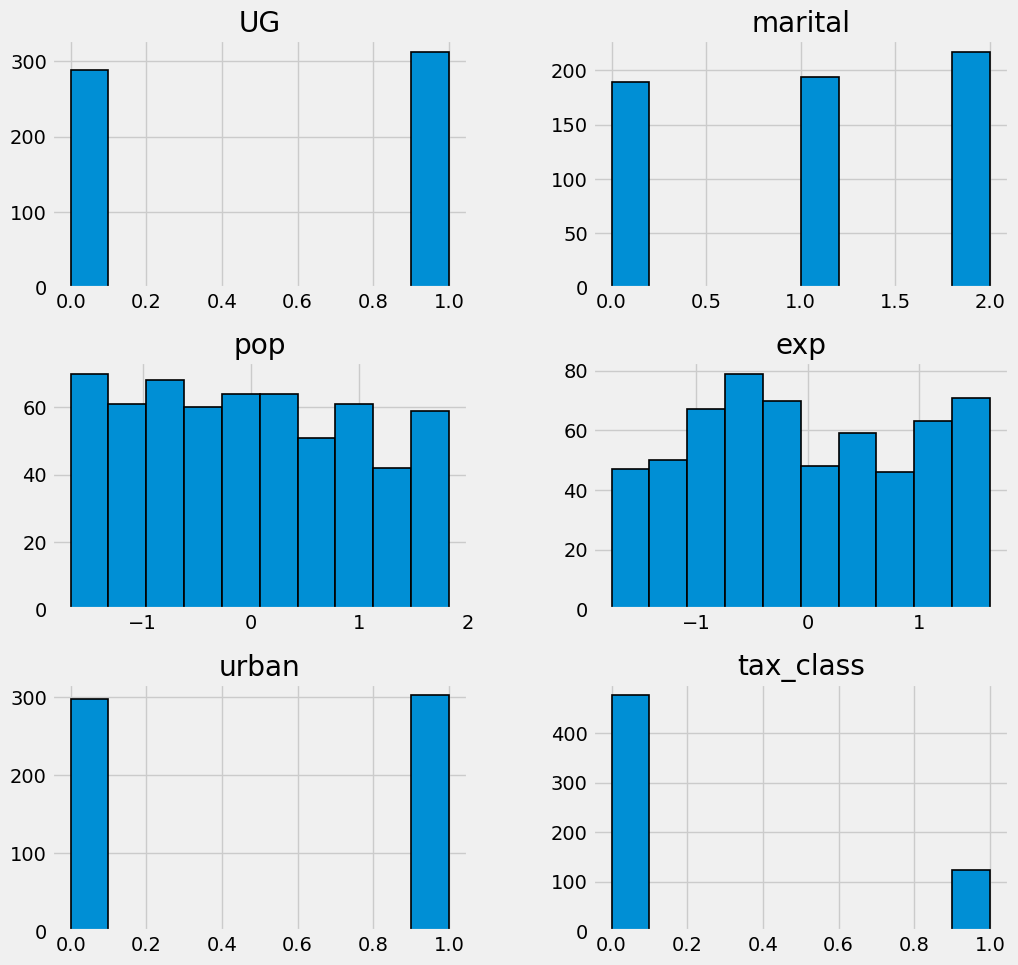

In [191]:
fr.hist(edgecolor = 'black', linewidth = 1.2, figsize = (11, 11));

In [164]:
fr.to_csv('auto.csv')

<Axes: >

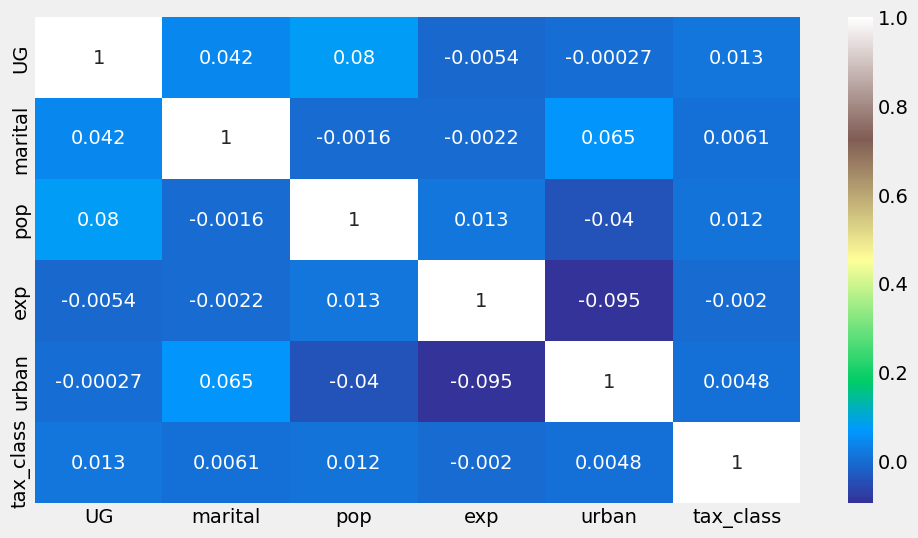

In [165]:
plt.figure(figsize = (11, 6))
sns.heatmap(fr.corr(), annot = True, cmap = 'terrain')

In [166]:
pdata = fr.copy()
pdata.head()

,UG,marital,pop,exp,urban,tax_class
0,0,2,-1.178521,-0.629143,1,0
1,1,0,0.508500,0.276370,1,0
2,0,1,1.033109,1.634639,1,0
3,1,2,1.696831,-0.063197,1,0
4,0,1,-1.630532,1.408261,0,0


In [167]:
x = pdata.iloc[:, 0:-1]
y = pdata['tax_class']
y.value_counts()

0    476
1    124
Name: tax_class, dtype: int64

In [168]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [169]:
modelb = RF()
modelb.fit(x_train, y_train)
pred = modelb.predict(x_test)
print(np.mean(y_test == pred))

0.7666666666666667


In [170]:
modelb = RF(criterion = 'gini', max_depth = 22, max_leaf_nodes = 20, n_estimators = 1000)
modelb.fit(x_train, y_train)
pred = modelb.predict(x_train)
print(np.mean(y_train == pred))

0.7979166666666667


In [171]:
kfold = KFold(n_splits = 11)
results = cross_val_score(modelb, x, y, cv = kfold)
print(results.mean())

0.7935414753596572


In [172]:
import warnings
warnings.filterwarnings('ignore')
modelb_1 = RF(n_estimators = 500, criterion = 'entropy', max_leaf_nodes = 20, max_depth = 20)
model = BC(base_estimator = modelb_1)
results = cross_val_score(model, x, y, cv = kfold)
print(results.mean())

0.7935414753596572


In [173]:
model = ABC(base_estimator = modelb)
results = cross_val_score(model, x, y, cv = kfold)
print(results.mean())

0.7585246403428222


In [174]:
estimators = []
model_1 = LR(max_iter = 500, solver = 'liblinear')
estimators.append(('LR', model_1))
model_2 = DTC()
estimators.append(('DTC', model_2))
model_3 = SVC()
estimators.append(('SVC', model_3))
model_4 = ABC(base_estimator = modelb_1)
estimators.append(('ABC', model_4))
model_5 = BC(base_estimator = modelb_1)
estimators.append(('BC', model_5))
model_6 = RF(n_estimators = 500, criterion = 'entropy', max_leaf_nodes = 20, max_depth = 20)
estimators.append(('RF', model_6))

ensemble = VC(estimators)
results = cross_val_score(ensemble, x, y, cv = kfold)
print(results)

[0.8        0.76363636 0.70909091 0.74545455 0.8        0.81818182
 0.7037037  0.88888889 0.75925926 0.81481481 0.92592593]


In [175]:
print(results.mean())

0.7935414753596572


In [176]:
from tqdm.notebook import tqdm, trange
import time
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [177]:
xgmodel = XGBClassifier()
xgmodel.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [178]:
y_pred = xgmodel.predict(x_test)
pred = [round(value) for value in y_pred]

In [179]:
y_pred_1 = xgmodel.predict(x_train)
pred_1 = [round(value) for value in y_pred_1]

In [180]:
acc = accuracy_score(y_test, pred)
print("Accuracy: %.2f%%" % (acc * 100))

Accuracy: 70.83%


In [181]:
acc = accuracy_score(y_train, pred_1)
print("Accuracy: %.2f%%" % (acc * 100))

Accuracy: 100.00%


In [184]:
import lightgbm as lgb

In [195]:
fr_train = lgb.Dataset(x_train, label = y_train)

In [186]:
params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary' 
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 10
params['min_data'] = 50
params['max_depth'] = 20

In [187]:
clf = lgb.train(params, fr_train, 100)

[LightGBM] [Info] Number of positive: 98, number of negative: 382
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000189 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 480, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.204167 -> initscore=-1.360453
[LightGBM] [Info] Start training from score -1.360453
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

In [193]:
y_pred = clf.predict(x_test)
y_pred

array([0.1987351 , 0.22884039, 0.19437262, 0.22026771, 0.19276865,
       0.20297837, 0.22028292, 0.20455681, 0.19317949, 0.21005671,
       0.20313997, 0.21046852, 0.1995722 , 0.20159573, 0.20749839,
       0.21753982, 0.1994963 , 0.20972066, 0.21028722, 0.19332027,
       0.19586905, 0.18897286, 0.20090651, 0.19124862, 0.21597034,
       0.20371172, 0.20439584, 0.21473196, 0.20216783, 0.23104444,
       0.18897593, 0.19771624, 0.20011052, 0.20204377, 0.21305993,
       0.19152507, 0.21289459, 0.18799497, 0.20555323, 0.19230523,
       0.22619202, 0.19492536, 0.19975397, 0.19411849, 0.19437262,
       0.18561812, 0.19963065, 0.2059733 , 0.20205243, 0.22485439,
       0.2059733 , 0.22028292, 0.20204377, 0.20402645, 0.22421132,
       0.19128501, 0.19759062, 0.19906724, 0.20418038, 0.19496981,
       0.22712097, 0.22511974, 0.20402645, 0.19707973, 0.19088927,
       0.20616765, 0.19498626, 0.20481974, 0.21351228, 0.21807879,
       0.21141302, 0.19948698, 0.23012201, 0.19088927, 0.19411

In [197]:
pred = [round(value) for value in y_pred]

In [190]:
acc = accuracy_score(y_test, pred)

0.7833333333333333